<a href="https://colab.research.google.com/github/NGUYEN-THI-HONG-NGOC-1005/AI/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTAI/NHẬN DIỆN MẶT/train', target_size=(400,300), batch_size=32, class_mode='categorical')

Found 75 images belonging to 3 classes.


In [ ]:

val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTAI/NHẬN DIỆN MẶT/val', target_size=(400,300), batch_size=32, class_mode='categorical')

Found 21 images belonging to 3 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training
dict = list(training_set.class_indices.keys())
training_set.class_indices



{'doan': 0, 'ngoc': 1, 'tue': 2}

In [ ]:
# Các nhãn có trong bộ dữ liệu test
val_set.class_indices

{'doan': 0, 'ngoc': 1, 'tue': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(400,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 400, 300, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 400, 300, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 200, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 200, 150, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 200, 150, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 75, 64)      0         
 2D)                                                  

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:

history=model.fit(training_set,epochs=20,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/20
3/3 [==============================] - 92s 37s/step - loss: 2.3413 - accuracy: 0.4667 - val_loss: 1.0644 - val_accuracy: 0.6667
Epoch 2/20
3/3 [==============================] - 66s 27s/step - loss: 1.0244 - accuracy: 0.5467 - val_loss: 1.0824 - val_accuracy: 0.3810
Epoch 3/20
3/3 [==============================] - 65s 18s/step - loss: 1.0545 - accuracy: 0.4800 - val_loss: 1.1039 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 65s 19s/step - loss: 0.9684 - accuracy: 0.5733 - val_loss: 1.0452 - val_accuracy: 0.3333
Epoch 5/20
3/3 [==============================] - 64s 19s/step - loss: 0.9025 - accuracy: 0.6000 - val_loss: 1.0148 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 66s 27s/step - loss: 0.8881 - accuracy: 0.5733 - val_loss: 0.7400 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 64s 26s/step - loss: 0.7190 - accuracy: 0.7733 - val_loss: 0.7408 - val_accuracy: 0.5714
Epoch 8/20
3/3 [===========

In [27]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0028613705653697252
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

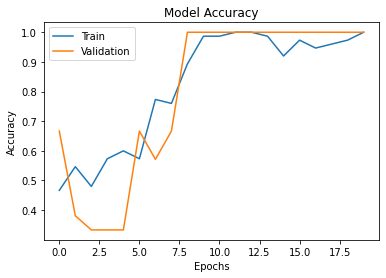

In [28]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [29]:
# Lưu lại
model.save("Face.h5")

In [30]:
# Tải mô hình 
model_face=load_model('Face.h5')

1/1 [==============================] - 0s 357ms/step
tue


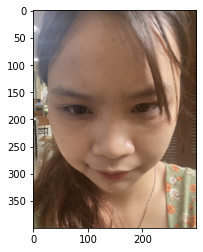

1/1 [==============================] - 0s 217ms/step
ngoc


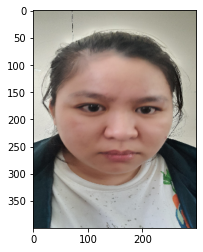

1/1 [==============================] - 1s 576ms/step
doan


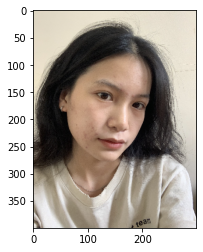

1/1 [==============================] - 0s 409ms/step
tue


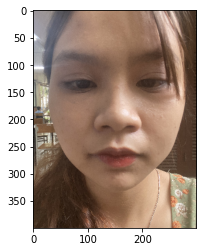

1/1 [==============================] - 1s 913ms/step
ngoc


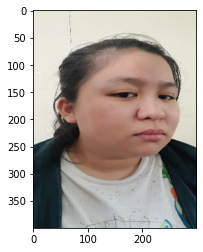

1/1 [==============================] - 0s 483ms/step
tue


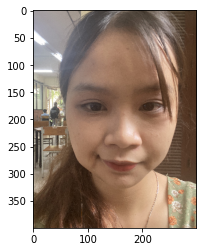

1/1 [==============================] - 0s 215ms/step
doan


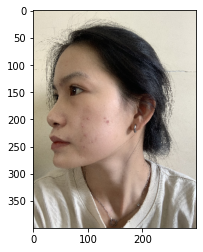

1/1 [==============================] - 0s 223ms/step
ngoc


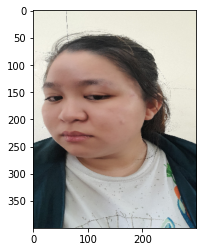

1/1 [==============================] - 0s 217ms/step
tue


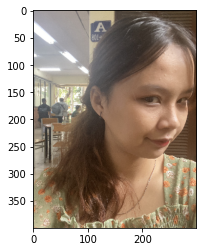

1/1 [==============================] - 0s 213ms/step
ngoc


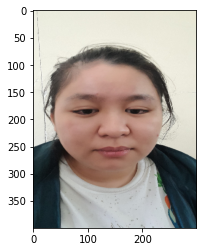

1/1 [==============================] - 0s 217ms/step
ngoc


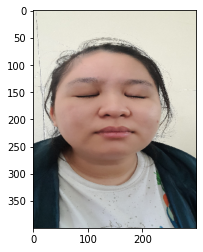

1/1 [==============================] - 0s 216ms/step
ngoc


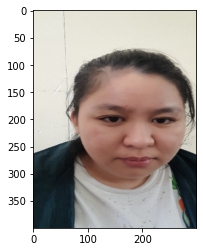

1/1 [==============================] - 0s 232ms/step
tue


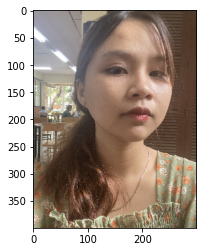

1/1 [==============================] - 0s 215ms/step
ngoc


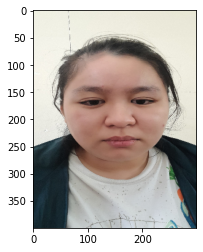

1/1 [==============================] - 0s 214ms/step
tue


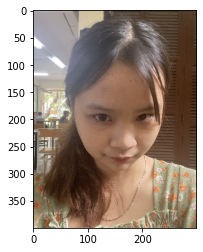

1/1 [==============================] - 0s 215ms/step
tue


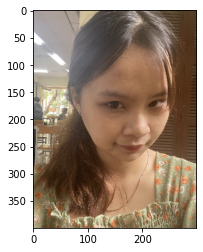

1/1 [==============================] - 0s 216ms/step
doan


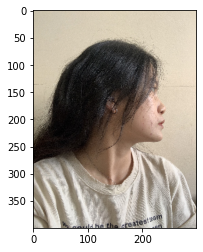

1/1 [==============================] - 0s 239ms/step
doan


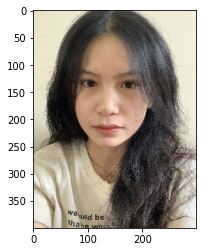

1/1 [==============================] - 0s 218ms/step
doan


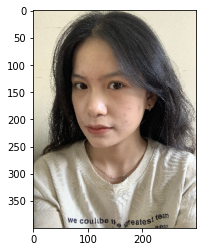

1/1 [==============================] - 0s 218ms/step
doan


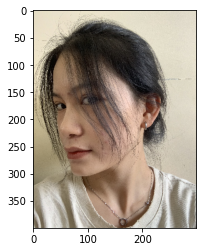

1/1 [==============================] - 0s 219ms/step
doan


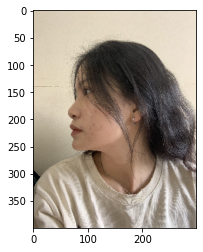

In [31]:
 test="/content/drive/MyDrive/Colab Notebooks/BTAI/NHẬN DIỆN MẶT/test"
import os
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(400,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_face.predict(img)
  for j in (range(len(result[0]))):
    if round(result[0][j])==1:
      prediction=dict[j]
      print(prediction)
      plt.show()
  

In [32]:
!jupyter nbconvert --to html "/content/Nhận_diện_khuôn_mặt (2).ipynb"


[NbConvertApp] WARNING | pattern '/content/Nhận_diện_khuôn_mặt (2).ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_ye